In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
path_vec = 'data/data-base/ChinaAdminDivisonSHP/2. Province/province.shp'



In [4]:
china_vec = gpd.read_file(path_vec)
china_vec.head()



,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.89226 39.69491, 116.89227 39.694..."
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((113.77712 36.63946, 113.7808 3..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((113.56331 36.5891, 113.55296 3..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((114.04201 40.60888, 114.04441 40.611..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((119.25798 42.22412, 119.25568 42.220..."


In [ ]:
china_vec.total_bounds


array([ 73.502355,   3.83703 , 135.09567 ,  53.563624])

In [8]:
def get_utm_zone(lon):
    zone = int(lon/6)+31
    return zone
utm_zone = get_utm_zone(lon=104)
print(utm_zone)


48


In [9]:
china_vec_utm48 = china_vec.to_crs(epsg=32648)
china_vec_utm48.head()


,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((1520948.491 4462107.434, 1520952.641..."
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((1285509.516 4090946.792, 12858..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((1266836.72 4083597.196, 126591..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((1265405.55 4534829.581, 1265581.817 ..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((1677752.153 4774225.669, 1677637.722..."


Text(0.5, 1.0, 'wgs84 utm48')

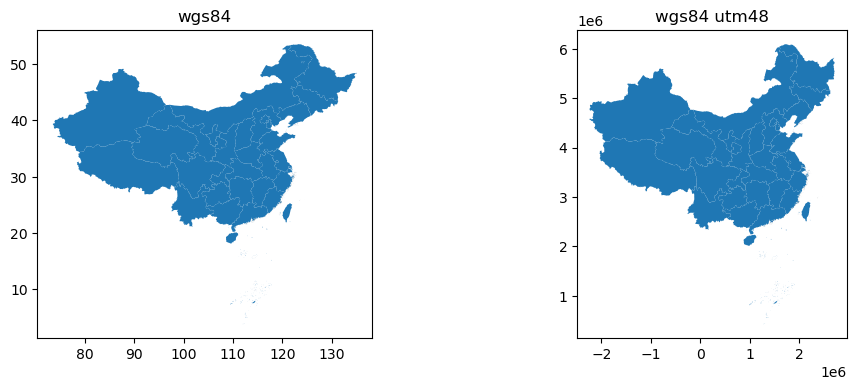

In [17]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
china_vec.plot(ax=ax[0])
ax[0].set_title('wgs84')
china_vec_utm48.plot(ax=ax[1])
ax[1].set_title('wgs84 utm48')



In [ ]:
path = 'data/data-base/region1_l8_20190504_wgs84.tif'



In [19]:
import rasterio as rio



In [21]:
rsimg_rio = rio.open(path)
rsimg_rio.bounds


BoundingBox(left=87.59975392008562, bottom=32.70990528300208, right=88.31014164676733, top=33.29066611418535)

In [ ]:
get_utm_zone(lon=88)


45

In [ ]:
!gdalwarp -s_srs EPSG:4326 -t_srs EPSG:32645 -r bilinear data/data-base/region1_l8_20190504_wgs84.tif data/data-section-4/rsimg_wgs84_utm45_gdal.tif


Processing data/data-base/region1_l8_20190504_wgs84.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
